## Computer Games Market Research

**Project Description**

In the course of this study, we will analyze data on sales of computer games collected from open sources

**The purpose of the study**

Identify patterns that determine the success of a computer game

**The essence of the study**

To analyze the data, the results of which will help to build a strategy for promoting the store in the computer games market

**Research objectives**

Perform preprocessing of the initial data - fill in the gaps, work out anomalies and analyze the resulting data array to answer the questions posed in the purpose of the study

**Initial data**

For the study, a table is presented that includes about 16.5 thousand records of game sales. The table includes information about the name, platform, ratings, evaluation and sales statistics in different regions.

**This study will be divided into several parts**

Part 1. [Data overview](#Data-overview)

Part 2. [Data preprocessing](#Data-preprocessing)

1. [name](#name)
2. [platform](#platform)
3. [year_of_release](#year_of_release)
4. [genre](#genre)
5. [scores](#scores)
6. [Total sales](#Total-sales)

Part 3. [Research data analysis](#Research-data-analysis)
1. [How many games have been released over the years](#How-many-games-have-been-released-over-the-years)
2. [Sales by platform](#Sales-by-platform)
3. [Which platforms are leading in sales, are they growing or falling?](#Which-platforms-are-leading-in-sales,-are-they-growing-or-falling?)
4. [Boxplot by global game sales by platform](#Boxplot-by-global-game-sales-by-platform)
5. [How do user reviews and critics affect sales within one popular platform](#How-do-user-reviews-and-critics-affect-sales-within-one-popular-platform)
6. [Correlate the findings with the sales of games on other platforms](#Correlate-the-findings-with-the-sales-of-games-on-other-platforms)
7. [General distribution of games by genre](#General-distribution-of-games-by-genre)

Part 4. [Portrait of the user of each region](#Portrait-of-the-user-of-each-region)
1. [Most popular platforms](#Most-popular-platforms)
 1.1 [North America](#North-America)
 1.2 [Europe](#Europe)
 1.3 [Japan](#Japan)
2. [Most popular genres](#Most-popular-genres)
 2.1 [North America](#North-America)
 2.2 [Europe](#Europe)
 2.3 [Japan](#Japan)
3. [The impact of the ESRB rating on sales in a particular region](#The-impact-of-the-ESRB-rating-on-sales-in-a-particular-region)
 3.1 [North America](#North-America)
 3.2 [Europe](#Europe)
 3.3 [Japan](#Japan)

Part 5. [Hypothesis testing](#Hypothesis-testing)
1. [The average user ratings of the Xbox One and PC platforms are the same](#The-average-user-ratings-of-the-Xbox-One-and-PC-platforms-are-the-same)
2. [Average user ratings of Action and Sports genres are different](#Average-user-ratings-of-Action-and-Sports-genres-are-different)

Part 6. [General conclusion](#General-conclusion)

### Data overview

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

try:
    data = pd.read_csv('D:/Документы/LinkedIn/6 Сборный Проект — 1/games.csv', decimal = ',')  # Local path
except:
    data = pd.read_csv('/datasets/games.csv', decimal = ',')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.0,0.0,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.0,0.01,0.0,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.0,0.0,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.0,0.0,0.0,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             16713 non-null  object
 1   Platform         16715 non-null  object
 2   Year_of_Release  16446 non-null  object
 3   Genre            16713 non-null  object
 4   NA_sales         16715 non-null  object
 5   EU_sales         16715 non-null  object
 6   JP_sales         16715 non-null  object
 7   Other_sales      16715 non-null  object
 8   Critic_Score     8137 non-null   object
 9   User_Score       10014 non-null  object
 10  Rating           9949 non-null   object
dtypes: object(11)
memory usage: 1.4+ MB


As part of a general overview of the data, the first thing that can be noticed is that the data type is not appropriate and there are omissions in different columns. Somewhere more, somewhere less. At the same time, in general, the information, i.e. the number of rows in the table is enough to build hypotheses.

### Data preprocessing

As part of the data preprocessing, we will go through each column separately. Let's look at the gaps, let's match the data type, let's look at rare and out-of-place values. But first of all, let's fix the general problem of the table - the names of columns. Let's bring them to the lower case. Additionally, as part of the general processing, we will check the table for obvious duplicates, so that we do not return to this issue later.

In [3]:
data.rename(mapper=str.lower, axis=1, inplace=True)
display(data.columns)
data.duplicated().sum()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

0

The column names have been corrected, there are no duplicates, we can proceed to processing each one separately

#### name

There are 2 missing values in the name column. There is no way to restore them, so it will be easier to exclude them, since 2 values will not affect the overall picture in any way.

In [4]:
data = data.query('name==name')

There is nothing more to correct in this column, we move on to the next one.

#### platform

There are no missing values and the data type is correct. Let's check for implicit duplicates

In [5]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

No duplicates have been identified, we can move on.

#### year_of_release

There are already about 250 missing values in the column. Too much volume to put down the years manually, finding the year of release of the game on the Internet. But, at the same time, it is still not so large a volume as to greatly affect the final result (about 1.5%). Let's look at the rows with the missing year and if there are no other columns to which values can be linked, delete the rows.

In [6]:
data.query('year_of_release != year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.8,0.97,0.0,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.0,0.0,0.0,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.0,0.0,0.0,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.0,0.0,0.0,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.0,0.0,0.0,NaN,NaN,NaN


The list includes games whose year is indicated in the name. And some of them are popular. We will not look through all the name lines, but will select only those games that have sold more than a million copies in any of the regions. For the code to work correctly, we will assign the corresponding float type to the sales values. There are no missing values there.

In [7]:
data['na_sales'] = data['na_sales'].astype('float')
data['eu_sales'] = data['eu_sales'].astype('float')
data['jp_sales'] = data['jp_sales'].astype('float')
data['other_sales'] = data['other_sales'].astype('float')
million_sales = data.query('(year_of_release != year_of_release) and (na_sales > 1 or eu_sales > 1 or jp_sales > 1 or other_sales > 1)')

In [8]:
million_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


The list of games was selected. There were a little more than 10 of them. Manually find the release years of these games and write the corresponding values to the year_list variable and insert the values from it into data

In [9]:
year_list = [2003, 2003, 2012, 2006, 1978, 2007, 2001, 2008, 2006, 2007, 1980, 1977]
index_list = million_sales.index

In [10]:
for i in range(0, 12):
    data.loc[index_list[i], 'year_of_release'] = year_list[i]

In [11]:
data.query('(year_of_release != year_of_release) and (na_sales > 1 or eu_sales > 1 or jp_sales > 1 or other_sales > 1)')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


We will delete the remaining rows with nan values, we will not assign the date type, since this does not make sense in our study.

In [12]:
data = data.query('year_of_release == year_of_release')
data['year_of_release'] = data['year_of_release'].astype('float').astype('int')     

Let's take a look at info() to the dataframe again

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16456 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16456 non-null  object 
 1   platform         16456 non-null  object 
 2   year_of_release  16456 non-null  int32  
 3   genre            16456 non-null  object 
 4   na_sales         16456 non-null  float64
 5   eu_sales         16456 non-null  float64
 6   jp_sales         16456 non-null  float64
 7   other_sales      16456 non-null  float64
 8   critic_score     7991 non-null   object 
 9   user_score       9847 non-null   object 
 10  rating           9776 non-null   object 
dtypes: float64(4), int32(1), object(6)
memory usage: 1.4+ MB


#### genre

In the genre column, let's try to find implicit duplicates:

In [14]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

There are no duplicates, no other problems either. Let's move on to the ratings.

#### scores

In the rating columns, almost half of the values are missing. It is impossible to fill them in or delete them without harming the final assessment. Therefore, we will leave these columns with omissions, but we will process the type and some values

At the beginning of the column with the critics' rating. There are no drop-down values here, so we'll just translate it to float.

In [15]:
data['critic_score'] = data['critic_score'].astype('float')

Next - user score. There is one interesting value here - tbd. Most likely, this is "to be done", i.e. something that will need to be done. Most likely, this means the Postpone button when the user is asked to rate the game. In fact, postponing is without evaluation, so it is most logical to put Nan values in tbd

In [16]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN).astype('float')

The last column is the rating. Ratings are different. Let's look at the unique values.

In [17]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Among other ratings, the list contains a designation that is no longer used by K-A (Kids-to-Adults). Today it is an E rating. Let's bring everything to the current format. Also, instead of Nan, we will indicate "without rating"

In [18]:
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].replace(np.NaN, 'без рейтинга')

#### Total sales

Let's record the total sales in all regions in a separate column

In [19]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

This completes the preprocessing. Finally, we will output info and proceed to the research data analysis

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16456 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16456 non-null  object 
 1   platform         16456 non-null  object 
 2   year_of_release  16456 non-null  int32  
 3   genre            16456 non-null  object 
 4   na_sales         16456 non-null  float64
 5   eu_sales         16456 non-null  float64
 6   jp_sales         16456 non-null  float64
 7   other_sales      16456 non-null  float64
 8   critic_score     7991 non-null   float64
 9   user_score       7470 non-null   float64
 10  rating           16456 non-null  object 
 11  sum_sales        16456 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


### Research data analysis

#### How many games have been released over the years

Let's see how many games were released over all the years shown in the table

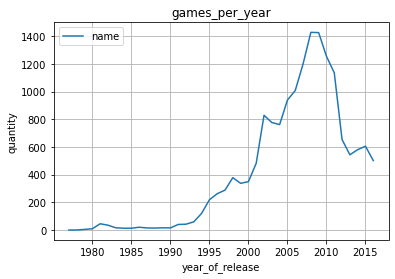

In [21]:
data_good_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
data_good_years.plot(grid=True, title='games_per_year', ylabel='quantity');

The issue for all periods is certainly not important to us. At the same time, two interesting points are visible - around 1995, a sharp increase in the release of games began, and after a peak in 2008, the release began to gradually decrease and stabilized in 2012-2013. Since we are building a model for 2017, it would be strange not to take into account recent years. At the same time, considering the 80s for planning activities in 2017 is also strange. Therefore, we will leave for further consideration the data starting from 1995.

#### Sales by platform

How sales by platform have changed. Select the platforms with the highest total sales and build a distribution by year. For what characteristic period of time do new platforms appear and old ones disappear?

Let's choose the 10 best-selling platforms

<AxesSubplot:xlabel='year_of_release'>

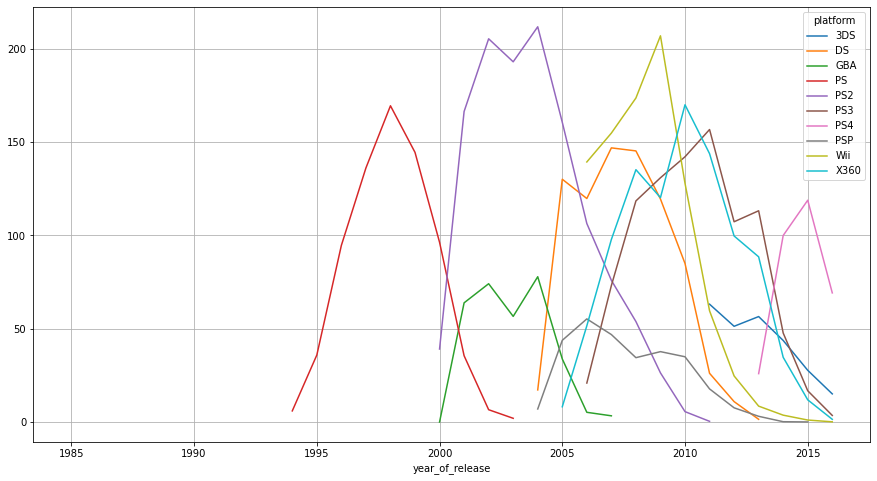

In [22]:
top_platform_list = data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(10).index
top_platform_data = data.loc[data['platform'].isin(top_platform_list)]
top_platform_data.groupby(['platform', 'year_of_release'])['sum_sales'].sum().unstack('platform').plot(grid=True, figsize=(15, 8))

It is impossible to say for sure that different platforms have characteristic behavior in the market. Some platform takes longer to enter the market, but lasts longer, which achieves maximum sales at the end of its release, some at the beginning. In addition, at the time of data construction, there was not a single platform that would show growth. The typical lifetime of the platform is about 5-7 years, depending on its popularity

#### Which platforms are leading in sales, are they growing or falling?

Taking into account the latest schedule, the actual period of trouble is still considered from 2011, when modern platforms began to appear. Let's select the corresponding data values and look at the graph more closely

In [23]:
normal_year_data = data.query('year_of_release >= 2014')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


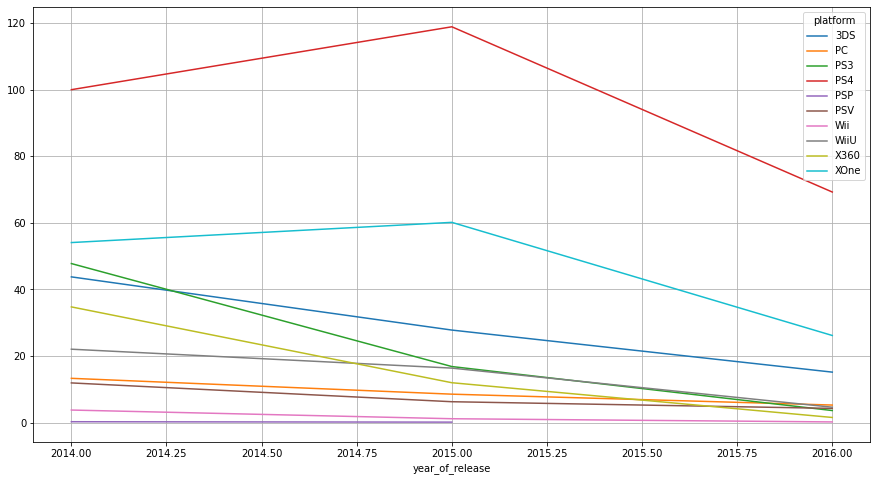

In [24]:
actual_data = normal_year_data.groupby(['platform', 'year_of_release'])['sum_sales'].sum().unstack('platform')
actual_data.plot(grid=True, figsize=(15, 8))
actual_data

The graph shows that there are top 3 platforms and the rest. To have a comparison base, we will limit the list of top-5 platforms by sales

In [25]:
top_sales_platforms_last_years = normal_year_data.groupby(['platform'])['sum_sales'].agg(['sum']).sort_values(by='sum',ascending = False).head(5)
actual_data = actual_data[top_sales_platforms_last_years.index]
actual_data

platform,PS4,XOne,3DS,PS3,X360
year_of_release,,,,,
2014,100.00,54.07,43.76,47.76,34.74
2015,118.90,60.14,27.78,16.82,11.96
2016,69.25,26.15,15.14,3.60,1.52


In this format, the leading platforms of the last 5 years are much better visible.

#### Boxplot by global game sales by platform

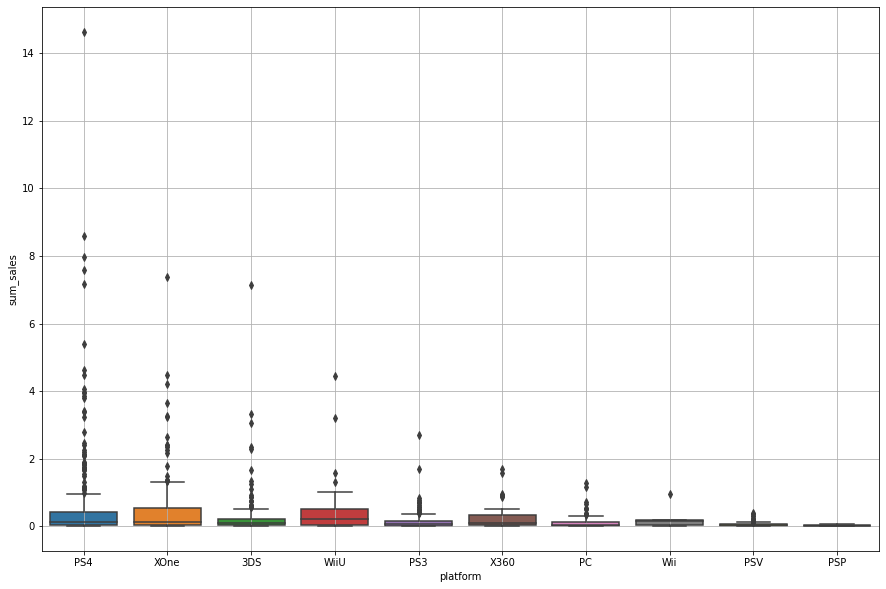

In [26]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.query('year_of_release > 2014'), y='sum_sales', x='platform')
plt.grid(True)

Strong deviations are visible on the Boxplot, especially on the most popular platforms - PS4, XBox one and Nintendo. Their presence can be explained by the fact that the number of games released on these platforms is large, but there are not so many popular ones. But if the game becomes really popular, then its sales are considered millions and it is not quite correct to compare it with the main array. Let's limit sum_sales to two million and look at the graph again

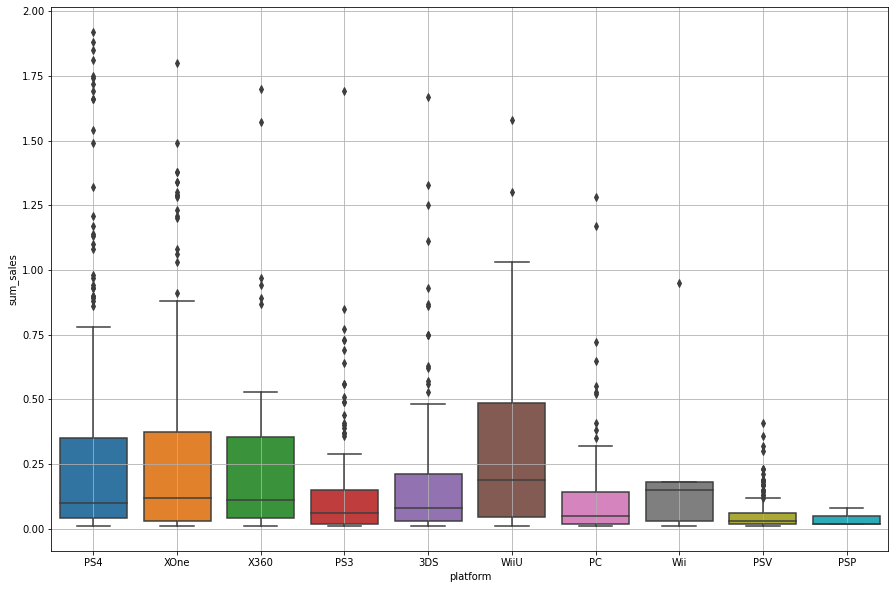

In [27]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.query('year_of_release > 2014 and sum_sales < 2'), y='sum_sales', x='platform')
plt.grid(True)

If the maximum amount is limited, the deviations are still preserved. This confirms what we wrote about in the last paragraph - the game market is extremely heterogeneous. There is a very big difference between the top games and the main mass.

#### How do user reviews and critics affect sales within one popular platform

For example, let's take the most popular platform of recent years - ps4

<AxesSubplot:title={'center':'critic_score'}, xlabel='critic_score', ylabel='sum_sales'>

<AxesSubplot:title={'center':'user_score'}, xlabel='user_score', ylabel='sum_sales'>

Correlation of sales with user ratings: -0.03195711020455643
Correlation of sales with critics ratings: 0.40656790206178123


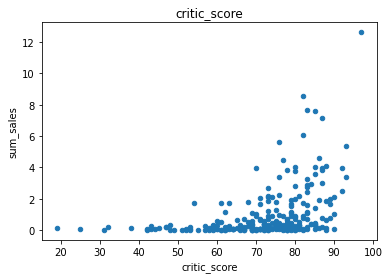

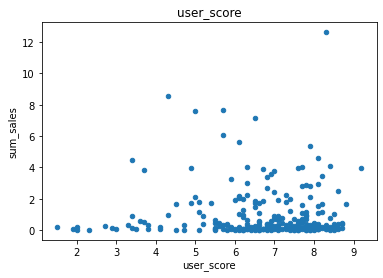

In [28]:
corr_data = data[data['platform'] == 'PS4'][['platform', 'critic_score', 'user_score', 'sum_sales']]
display(corr_data.plot(kind='scatter', x='critic_score', y='sum_sales', title='critic_score'))
display(corr_data.plot(kind='scatter', x='user_score', y='sum_sales', title='user_score'))
print('Correlation of sales with user ratings:', corr_data['sum_sales'].corr(corr_data['user_score']))
print('Correlation of sales with critics ratings:', corr_data['sum_sales'].corr(corr_data['critic_score']))

As shown by the Pearson correlation coefficient and which is also clearly visible on the scatter diagram, the sales of the game practically do not depend on user ratings. Critics' assessment also does not greatly affect sales, but there is still a certain dependence.

#### Correlate the findings with the sales of games on other platforms

Let's look at other popular platforms from the actual_data list. First, let's update core_data.

In [29]:
corr_data = data.query('platform in @actual_data.columns')[['platform', 'critic_score', 'user_score', 'sum_sales']]

PS4 Correlation of sales with critics ratings: 0.40656790206178123
XOne Correlation of sales with critics ratings: 0.41699832800840153
3DS Correlation of sales with critics ratings: 0.34873973059848334
PS3 Correlation of sales with critics ratings: 0.43275895789971397
X360 Correlation of sales with critics ratings: 0.39361252144375686


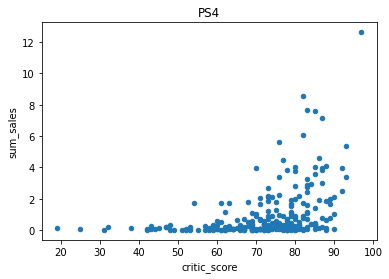

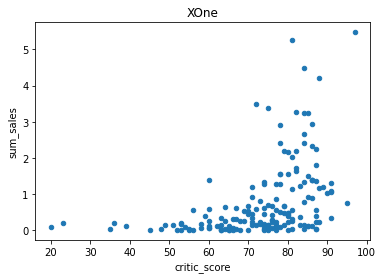

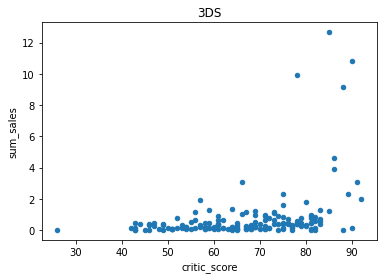

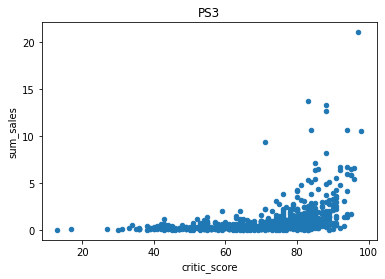

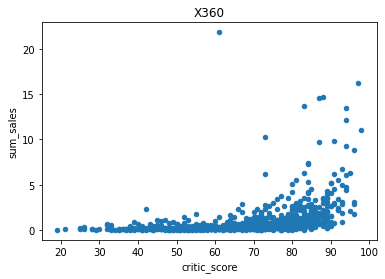

In [56]:
for i in range(0, 5):
    corr_data[corr_data['platform'] == actual_data.columns[i]].plot(
        kind='scatter', x='critic_score', y='sum_sales', title=actual_data.columns[i])
    print(actual_data.columns[i], 'Correlation of sales with critics ratings:', corr_data[corr_data['platform'] == actual_data.columns[i]]['sum_sales'].corr(
        corr_data[corr_data['platform'] == actual_data.columns[i]]['critic_score']))

On other platforms, the situation is similar to PS4. The correlation is about 0.4. Let's see the players' scores

PS4 Correlation of sales with users ratings: -0.03195711020455643
XOne Correlation of sales with users ratings: -0.06892505328279418
3DS Correlation of sales with users ratings: 0.22207843643390884
PS3 Correlation of sales with users ratings: 0.12841562938563023
X360 Correlation of sales with users ratings: 0.11502281947723501


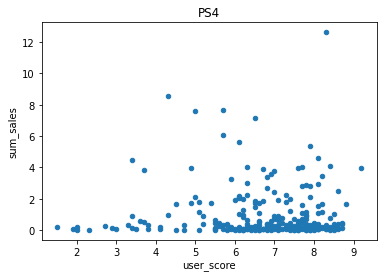

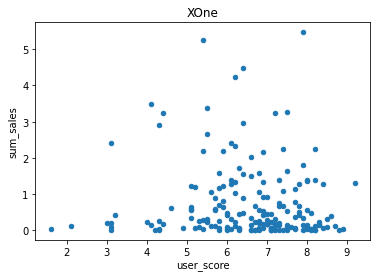

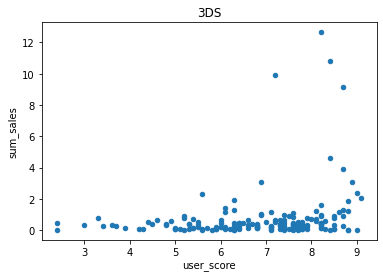

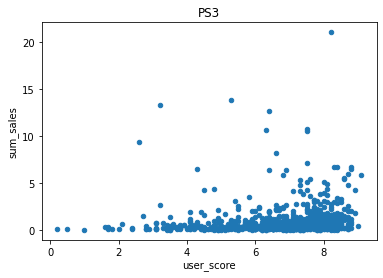

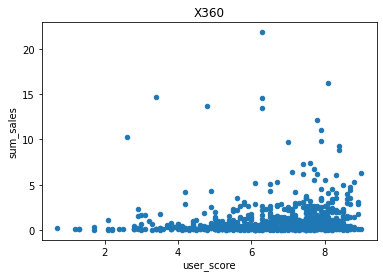

In [58]:
for i in range(0, 5):
    corr_data[corr_data['platform'] == actual_data.columns[i]].plot(
        kind='scatter', x='user_score', y='sum_sales', title=actual_data.columns[i])
    print(actual_data.columns[i], 'Correlation of sales with users ratings:', corr_data[corr_data['platform'] == actual_data.columns[i]]['sum_sales'].corr(
        corr_data[corr_data['platform'] == actual_data.columns[i]]['user_score']))

In general, the situation is similar. User evaluation has little effect on sales. The only platform on which ratings have any effect is nintendo

#### General distribution of games by genre

In [32]:
display(data.groupby('genre')['sum_sales'].sum().sort_values(ascending=False))
display(data.groupby('genre')['sum_sales'].sum().describe())

genre
Action          1723.16
Sports          1318.41
Shooter         1046.13
Role-Playing     931.08
Platform         825.55
Misc             794.85
Racing           723.49
Fighting         445.66
Simulation       387.96
Puzzle           239.89
Adventure        237.03
Strategy         172.57
Name: sum_sales, dtype: float64

count      12.000000
mean      737.148333
std       474.583551
min       172.570000
25%       350.942500
50%       759.170000
75%       959.842500
max      1723.160000
Name: sum_sales, dtype: float64

В списке явно выделяются игры в жанре action. Также популярны спортивные игры и шутеры. Наименее же популярны игры в жанрах страгтегии, паззлов, приключений

In [33]:
display(data.groupby('genre')['sum_sales'].mean().sort_values(ascending=False))
display(data.groupby('genre')['sum_sales'].mean().describe())

genre
Platform        0.940262
Shooter         0.805955
Role-Playing    0.628683
Racing          0.590122
Sports          0.571235
Fighting        0.531814
Action          0.520592
Misc            0.461317
Simulation      0.452695
Puzzle          0.421599
Strategy        0.256419
Adventure       0.183035
Name: sum_sales, dtype: float64

count    12.000000
mean      0.530311
std       0.208302
min       0.183035
25%       0.444921
50%       0.526203
75%       0.599763
max       0.940262
Name: sum_sales, dtype: float64

If we count on the average, then the value of the Action indicator is greatly sagging. If by total sales this genre was in the lead, then by average it was already in the middle of the rating. Also unusual is a sharp rise in the rating of games of the Platform genre. Let's look at these genres in more detail and try to explain the nature of such metamorphoses

In [34]:
display(data.query('genre == "Action"')['sum_sales'].describe())
display(data.query('genre == "Platform"')['sum_sales'].describe())

count    3310.000000
mean        0.520592
std         1.154693
min         0.010000
25%         0.070000
50%         0.190000
75%         0.490000
max        21.050000
Name: sum_sales, dtype: float64

count    878.000000
mean       0.940262
std        2.587816
min        0.010000
25%        0.090000
50%        0.270000
75%        0.805000
max       40.240000
Name: sum_sales, dtype: float64

Apparently, a high place in the first rating (in terms of total sales) for Action genre games gave a large number of these games. Indeed, finding the average sales allowed us to smooth out the picture and see additional genres that can provide high sales.

### Portrait of the user of each region

#### Most popular platforms

Declaring a function to build pie chart and plot

In [35]:
def pie_chart(column, region_sales):
    region_column = normal_year_data.groupby([column])[region_sales].sum().sort_values(ascending=False)
    display(region_column)
    region_column.plot(grid=True, kind='pie')

In [62]:
def column_plot_year_dependence(column, region_sales):
    region_column = normal_year_data.groupby([column, 'year_of_release'])[region_sales].sum().unstack(column)
    region_top_column_last_years = normal_year_data.groupby([column])[region_sales].agg(['sum']).sort_values(by='sum',ascending = False).head(5)
    region_column = region_column[region_top_column_last_years.index]
    display(region_column)
    region_column.plot(grid=True)

##### North America

Let's look at the most popular platforms in North America for the period since 2011, which we previously designated as directly related to the present.

platform,PS4,XOne,X360,3DS,PS3
year_of_release,,,,,
2014,34.75,30.97,20.25,12.33,16.39
2015,42.37,36.03,7.36,6.17,4.99
2016,21.49,14.27,0.69,4.14,0.67


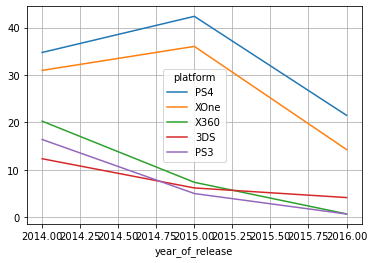

In [64]:
column_plot_year_dependence('platform', 'na_sales')

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
WiiU    19.36
PC       7.23
PSV      2.52
Wii      2.08
PSP      0.00
Name: na_sales, dtype: float64

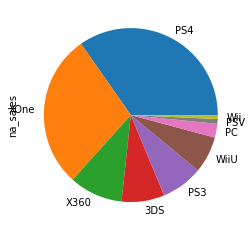

In [37]:
pie_chart('platform', 'na_sales')

Xbox has a slightly larger share in the North American market. Xbox is produced by the American company Microsoft, so this state of affairs is understandable. It is also worth noting that, unlike the general sales statistics, Nintendo is almost not sold in North America.

##### Europe

platform,PS4,XOne,PS3,PC,3DS
year_of_release,,,,,
2014,46.50,18.15,18.24,8.87,8.73
2015,51.76,18.47,6.04,5.57,5.06
2016,31.78,9.63,1.26,3.53,2.33


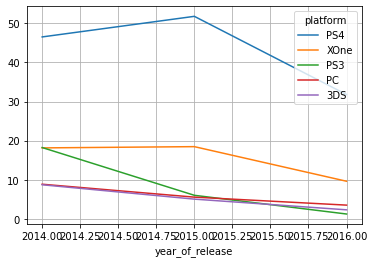

In [65]:
column_plot_year_dependence('platform', 'eu_sales')

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
X360     15.49
WiiU     13.15
PSV       3.53
Wii       2.59
PSP       0.00
Name: eu_sales, dtype: float64

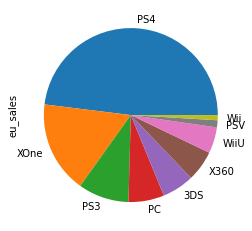

In [39]:
pie_chart('platform', 'eu_sales')

Almost half of the market is occupied by PS4

##### Japan

platform,3DS,PS4,PSV,PS3,WiiU
year_of_release,,,,,
2014,20.69,2.97,6.13,6.25,3.19
2015,15.52,6.31,4.85,3.67,3.45
2016,8.03,5.74,3.56,1.30,0.67


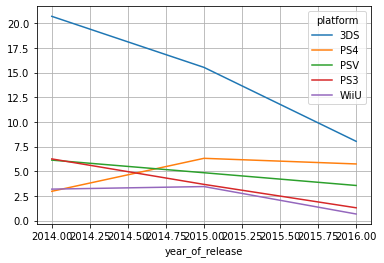

In [66]:
column_plot_year_dependence('platform', 'jp_sales')

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
PSP      0.36
XOne     0.32
X360     0.08
PC       0.00
Wii      0.00
Name: jp_sales, dtype: float64

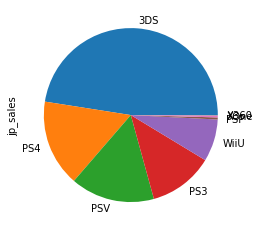

In [41]:
pie_chart('platform', 'jp_sales')

In Japan, they prefer their own manufacturer and in different forms. Only in Japan, the most popular platform is Nintendo. In addition, various PS formats are popular. But there is no XBox at all.

#### Most popular genres

##### North America

genre,Shooter,Action,Sports,Role-Playing,Misc
year_of_release,,,,,
2014,30.84,38.85,19.82,13.65,9.47
2015,31.94,24.39,18.77,13.93,4.82
2016,16.24,9.29,7.54,5.89,0.76


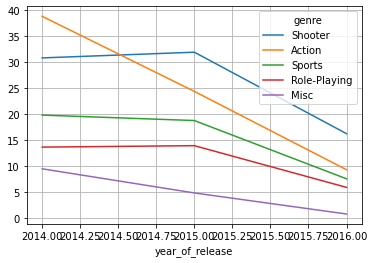

In [67]:
column_plot_year_dependence('genre', 'na_sales')

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Fighting        12.43
Racing           8.74
Platform         6.79
Adventure        5.64
Simulation       2.63
Strategy         0.98
Puzzle           0.65
Name: na_sales, dtype: float64

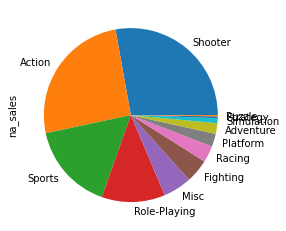

In [43]:
pie_chart('genre', 'na_sales')

In North America, the most popular games are shooter, action, sports and RPG genres

##### Europe

genre,Action,Shooter,Sports,Role-Playing,Racing
year_of_release,,,,,
2014,39.86,25.24,17.91,10.96,7.61
2015,24.14,24.38,15.81,12.93,4.75
2016,10.68,15.90,12.01,4.28,1.77


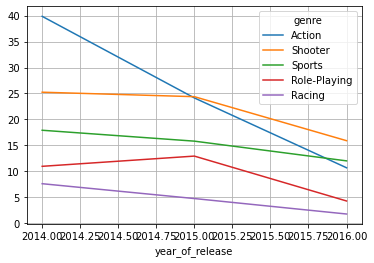

In [68]:
column_plot_year_dependence('genre', 'eu_sales')

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Misc            12.86
Simulation       7.30
Platform         6.80
Fighting         6.69
Adventure        6.49
Strategy         1.79
Puzzle           0.52
Name: eu_sales, dtype: float64

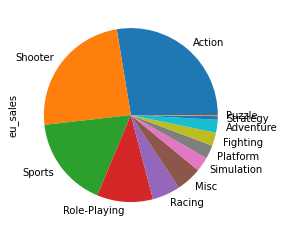

In [45]:
pie_chart('genre', 'eu_sales')

European preferences almost coincide with North American ones. Only the shares differ, but they are not much

##### Japan

genre,Role-Playing,Action,Fighting,Misc,Shooter
year_of_release,,,,,
2014,17.75,6.53,4.83,2.42,1.08
2015,6.80,15.98,0.79,2.15,2.73
2016,6.61,7.07,0.75,1.04,1.06


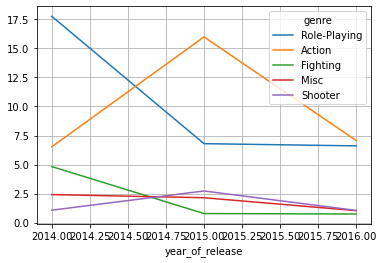

In [69]:
column_plot_year_dependence('genre', 'jp_sales')

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Adventure        3.60
Sports           3.26
Platform         2.69
Simulation       2.31
Racing           1.76
Strategy         0.95
Puzzle           0.93
Name: jp_sales, dtype: float64

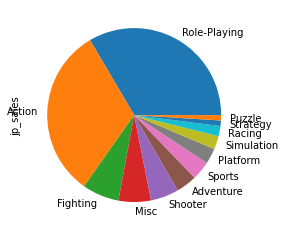

In [47]:
pie_chart('genre', 'jp_sales')

As it often happens, things are different in Japan. The most popular genres are only two - RPG and action.

#### The impact of the ESRB rating on sales in a particular region

##### North America

rating
M               96.42
без рейтинга    64.72
E               50.74
T               38.95
E10+            33.23
Name: na_sales, dtype: float64

<AxesSubplot:ylabel='na_sales'>

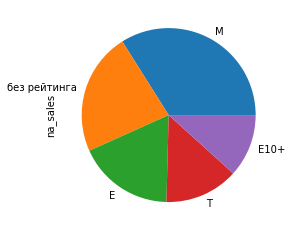

In [48]:
na_rating = normal_year_data.groupby(['rating'])['na_sales'].sum().sort_values(ascending=False)
display(na_rating)
na_rating.plot(grid=True, kind='pie')

In the North American region, M-rated games are best sold, that is, for people over 17 years old. This may indicate that the audience of computer games in the region is quite mature.

##### Europe

rating
M               93.44
без рейтинга    58.95
E               58.06
T               34.07
E10+            26.16
Name: eu_sales, dtype: float64

<AxesSubplot:ylabel='eu_sales'>

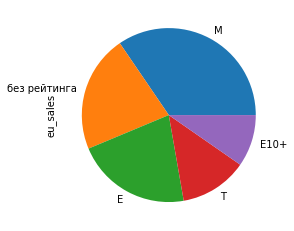

In [49]:
eu_rating = normal_year_data.groupby(['rating'])['eu_sales'].sum().sort_values(ascending=False)
display(eu_rating)
eu_rating.plot(grid=True, kind='pie')

Similar situation in Europe

##### Japan

rating
без рейтинга    56.90
T               14.78
E                8.94
M                8.01
E10+             4.46
Name: jp_sales, dtype: float64

<AxesSubplot:ylabel='jp_sales'>

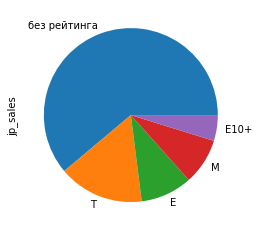

In [50]:
jp_rating = normal_year_data.groupby(['rating'])['jp_sales'].sum().sort_values(ascending=False)
display(jp_rating)
jp_rating.plot(kind='pie', grid=True)

But in Japan, the situation is different - the most popular games without a rating. Perhaps this is due to local legislation, that for games produced for the local market, assigning a rating is not a mandatory parameter

### Hypothesis testing

#### The average user ratings of the Xbox One and PC platforms are the same

Zero theory - The average user ratings of the Xbox One and PC platforms are the same. <br>
An alternative theory is that the average user ratings of the Xbox One and PC platforms differ.<br>
To consider hypotheses, we choose a method for comparing general aggregates. There are not so many values, so it will be more accurate to consider them as a whole.
In order not to get a Nan value as a result, we exclude all zero user_score values from the dataframe

In [53]:
not_nan_user_score = normal_year_data.query('user_score == user_score')

In [70]:
results = st.ttest_ind(not_nan_user_score.loc[not_nan_user_score.platform == 'XOne', 'user_score'],
                      not_nan_user_score.loc[not_nan_user_score.platform == 'PC', 'user_score'], equal_var = False)
alpha = .05

print('p-value:', results.pvalue)


if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Do not reject the null hypothesis")


p-value: 0.11601398086668832
Do not reject the null hypothesis


#### Average user ratings of Action and Sports genres are different

Here, similarly to the previous paragraph, we will consider general aggregates. <br>
Zero Theory - average user ratings of Action and Sports genres differ <br>
Alternative theory - average user ratings of Action and Sports genres are the same

In [60]:
results = st.ttest_ind(not_nan_user_score.loc[not_nan_user_score.genre == 'Action', 'user_score'],
                      not_nan_user_score.loc[not_nan_user_score.genre == 'Sports', 'user_score'], equal_var = False)
alpha = .05

print('p-value:', results.pvalue)


if (results.pvalue > alpha):
    print("Reject the null hypothesis")
else:
    print("Do not reject the null hypothesis")

p-value: 1.1825550382644557e-14
Do not reject the null hypothesis


### General conclusion

As part of the project, we examined a set of data and statistics on sales of computer games in different regions, collected from open sources. Based on the results of the study, the following conclusions can be drawn: <br>
1) Age rating and user ratings do not affect sales <br>
2) It is necessary to focus sales on just a few platforms - PS and PC for everyone, XBox for the North American market and Nintendo for Japan <br>
3) In general, the sales market in the regions under consideration is declining. In recent years, the decline has slowed down, but so far it says nothing about the trend reversal in the near future <br>
4) Working with critics is important, as their ratings have an impact on the sales of a particular game <br>
5) When developing a strategy for the implementation of computer games, it is necessary to take into account regional genre specifics.